## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

# 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?


### 1. Find an interesting problem/task

Predicting future stock prices based on historical data is an interesting and potentially lucrative problem that would likely appeal to many in a group. Building predictive models to forecast stock performance could have significant financial payoff if successful.

### 2. Define the objective 

Build a model that can accurately predict future stock prices for S&P 500 companies in order to make profitable trades and investment decisions.

### 3. Frame the problem

This is a supervised learning problem, as we have both input features (historical stock data) and known output labels (future stock prices) to train a model on. 

Specifically, it can be framed as a regression task, where the model predicts a continuous output variable (future price) based on a set of input variables (historical prices, volume, etc.)

Time series forecasting techniques could also be applicable here given the sequential nature of the data.

### 4. Measure performance

The performance of the stock price prediction model can be measured using standard regression evaluation metrics, such as:

- Mean Absolute Error (MAE) - average absolute difference between predicted and actual prices
- Mean Squared Error (MSE) - average of the squared differences between predicted and actual prices  
- Root Mean Squared Error (RMSE) - square root of the MSE
- R^2 Score - proportion of the variance in the target variable explained by the model

Ultimately, the real-world performance would be evaluated by the profitability of trades or investments made based on the model's predictions. But the above metrics can be used to optimize the model during development.

# 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

Our data is from Kaggle and it has 619k row and 7 column its a time series data

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correltions between features
7. Identify the proamising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

In [ ]:
# Imports and logging configuration
import logging
from pathlib import Path
from typing import Tuple, Union, Optional
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import logging
from pathlib import Path
from typing import Tuple, Union, Optional
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import zscore
from prophet import Prophet
import pmdarima as pm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Configuring the logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [ ]:
# Section 2: Load Data
def load_data(filepath: Union[str, Path]) -> Optional[pd.DataFrame]:
    """Load stock data from a CSV file."""
    try:
        data = pd.read_csv(filepath)
        data['date'] = pd.to_datetime(data['date'])
        required_columns = {'date', 'open', 'high', 'low', 'close', 'volume', 'Name'}
        missing_columns = required_columns - set(data.columns)
        if missing_columns:
            raise ValueError(f"Missing columns: {missing_columns}")
        logger.info("Data loaded successfully.")
        return data
    except Exception as e:
        logger.error(f"Error loading data: {e}")
        return None

filepath = 'all_stocks_5yr.csv'
data = load_data(filepath)
data.head()


In [ ]:
# Data Exploration
def explore_data(data: pd.DataFrame) -> pd.DataFrame:
    """Explore the data and log it"""
    exploration_report = []
    for col in data.columns:
        col_type = data[col].dtype
        missing_persentage = data[col].isnull().mean() * 100
        unique_values = data[col].nunique()
        #Check if the column is numerical and calculate the number of outliers
        # using z-score method (values that are 3 standard deviations away from the mean)
        outliers = [(np.abs(stats.zscore(data[col])) > 3).sum()] if np.issubdtype(data[col].dtype, np.number) else None
        exploration_report.append ({
            'column': col,
            'type': col_type,
            'missing_values': missing_persentage,
            'unique_values': unique_values,
            'outliers': outliers
        })

        logger.info(f"FEATURE: {col}, TYPE: {col_type}, MISSING: {missing_persentage:.2F}%, UNIQUE: {unique_values}, OUTLIERS: {outliers}")
    exploration = pd.DataFrame(exploration_report)
    logger.info(f"Exploration Report :\n{exploration}") 
exploration_report = explore_data(data)
exploration_report

In [ ]:
# Section 4: Visualize Data
def visualize_data(stock_data: pd.DataFrame, stock_name: str) -> None:
    """Visualize stock prices and trading volume over time."""
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Close')
    plt.plot(stock_data['date'], stock_data['open'], label='Open')
    plt.plot(stock_data['date'], stock_data['high'], label='High')
    plt.plot(stock_data['date'], stock_data['low'], label='Low')
    plt.legend()
    plt.title(f'Stock Prices Over Time: {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['volume'], label='Volume')
    plt.legend()
    plt.title(f'Trading Volume Over Time: {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

def plot_correlation_matrix(stock_data: pd.DataFrame) -> None:
    """Plot the correlation matrix of the stock data features."""
    features = [col for col in stock_data.columns if col not in ['date', 'Name']]
    corr_matrix = stock_data[features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

stock_name = 'AAPL'
stock_data = data[data['Name'] == stock_name]
visualize_data(stock_data, stock_name)
plot_correlation_matrix(stock_data)


In [ ]:

# Clean and Engineer Features

def calculate_rsi(prices: pd.Series, window: int = 14) -> pd.Series:
    """
    Calculate the Relative Strength Index (RSI) for a given series of prices.
    
    RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions.
    It ranges from 0 to 100, with values above 70 indicating overbought conditions and values below 30 indicating oversold conditions.
    
    :param prices: Series of prices
    :param window: Rolling window size for RSI calculation (default: 14)
    :return: Series of RSI values
    """
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(prices: pd.Series, short_period: int = 12, long_period: int = 26, signal_period: int = 9) -> Tuple[pd.Series, pd.Series]:
    """
    Calculate the Moving Average Convergence Divergence (MACD) for a given series of prices.
    
    MACD is a trend-following momentum indicator that shows the relationship between two moving averages of prices.
    It consists of the MACD line (difference between short-term and long-term moving averages) and the signal line (moving average of the MACD line).
    Crossovers between the MACD line and the signal line can generate buy or sell signals.
    
    :param prices: Series of prices
    :param short_period: Short-term EMA period (default: 12)
    :param long_period: Long-term EMA period (default: 26)
    :param signal_period: Signal line EMA period (default: 9)
    :return: Tuple of MACD and signal line series
    """
    short_ema = prices.ewm(span=short_period, adjust=False).mean()
    long_ema = prices.ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(prices: pd.Series, window: int = 20, num_std: int = 2) -> Tuple[pd.Series, pd.Series]:
    """
    Calculate Bollinger Bands for a given series of prices.
    
    Bollinger Bands are a volatility-based indicator that consists of a middle band (simple moving average) and two outer bands (upper and lower).
    The outer bands are typically set 2 standard deviations above and below the middle band.
    Bollinger Bands can help identify overbought or oversold conditions, as well as potential price breakouts or reversals.
    
    :param prices: Series of prices
    :param window: Rolling window size for Bollinger Bands calculation (default: 20)
    :param num_std: Number of standard deviations for upper and lower bands (default: 2)
    :return: Tuple of upper and lower Bollinger Bands series
    """
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

def engineer_features(data: pd.DataFrame) -> pd.DataFrame:
    """
    Engineer features for the stock data.
    
    This function performs various feature engineering techniques on the stock data, including:
    - Log-transforming the volume if its distribution is highly skewed
    - Adding the previous day's closing price
    - Calculating moving averages for different time windows
    - Calculating the Relative Strength Index (RSI)
    - Calculating the Moving Average Convergence Divergence (MACD) and signal line
    - Calculating Bollinger Bands
    - Calculating the percentage change in closing price
    - Calculating the volatility (standard deviation of closing prices)
    - Adding lag features for closing price
    
    :param data: DataFrame of stock data
    :return: DataFrame with engineered features
    """
    # Log-transform the volume if its distribution is highly skewed
    if data['volume'].skew() > 1:
        data['log_volume'] = np.log1p(data['volume'])
    
    # Add previous day's closing price
    data['prev_close'] = data['close'].shift(1)
    
    # Calculate moving averages for different windows
    ma_windows = [7, 14, 21]
    for window in ma_windows:
        data[f'{window}_day_ma'] = data['close'].rolling(window=window).mean()
    
    # Calculate the RSI
    data['rsi'] = calculate_rsi(data['close'])
    
    # Calculate the MACD and signal line
    data['macd'], data['signal_line'] = calculate_macd(data['close'])
    
    # Calculate Bollinger Bands
    data['bollinger_upper'], data['bollinger_lower'] = calculate_bollinger_bands(data['close'])
    
    # Calculate the percentage change in closing price
    data['pct_change'] = data['close'].pct_change()
    
    # Calculate the volatility (standard deviation of closing prices)
    data['volatility'] = data['close'].rolling(window=14).std()
    
    # Add lag features for closing price
    for lag in range(1, 4):
        data[f'lag_{lag}'] = data['close'].shift(lag)
    
    # Remove rows with any missing values
    data.dropna(inplace=True)
    
    return data

# Example usage
data_dict = {
    'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'close': np.random.randn(100).cumsum() + 100,
    'volume': np.random.randint(100, 1000, size=100)
}
stock_data = pd.DataFrame(data_dict)

# Process the stock data
engineered_data = engineer_features(stock_data)
print(engineered_data.head())

In [ ]:
#Scale Features

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, threshold: float = 3.0):
        """
        Initialize the OutlierHandler with a specified z-score threshold.
        
        Parameters:
        threshold (float): The z-score threshold to identify outliers.
        """
        self.threshold = threshold

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None) -> 'OutlierHandler':
        """
        Fit method, required for compatibility with scikit-learn pipeline.
        It doesn't perform any fitting and returns self.
        
        Parameters:
        X (pd.DataFrame): Input data.
        y (pd.Series, optional): Target data (not used).

        Returns:
        self: The fitted transformer.
        """
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """
        Transform method to replace outliers in the DataFrame with the median value of the column.
        
        Parameters:
        X (pd.DataFrame): Input data to transform.
        
        Returns:
        pd.DataFrame: Transformed data with outliers replaced by the median value.
        """
        X = X.copy()
        for col in X.columns:
            # Calculate z-scores for the column
            z_scores = zscore(X[col])
            # Replace outliers (z-score > threshold) with the median value of the column
            X[col] = np.where(np.abs(z_scores) > self.threshold, np.median(X[col]), X[col])
        return X

def scale_features(data: pd.DataFrame) -> Tuple[pd.DataFrame, RobustScaler]:
    """
    Scale features using RobustScaler to reduce the impact of outliers.
    
    Parameters:
    data (pd.DataFrame): Input data containing the features to be scaled.
    
    Returns:
    Tuple[pd.DataFrame, RobustScaler]: The scaled data and the scaler object.
    """
    scaler = RobustScaler()
    # List of features to be scaled
    features = ['open', 'high', 'low', 'close', 'volume']
    
    # Check which features are present in the DataFrame
    available_features = [feature for feature in features if feature in data.columns]
    
    if not available_features:
        raise KeyError(f"None of the expected features {features} are present in the DataFrame.")

    # Scale the available features
    data[available_features] = scaler.fit_transform(data[available_features])
    logger.info("Features scaled.")
    return data, scaler

try:
    scaled_data, scaler = scale_features(engineered_data)
    print(scaled_data.head())
except KeyError as e:
    logger.error(e)


In [ ]:
# Section 7: Save Transformed Data
def save_transformed_data(stock_data: pd.DataFrame, filename: Union[str, Path]) -> None:
    """Save the transformed stock data to a CSV file."""
    stock_data.to_csv(filename, index=False)
    logger.info(f"Transformed data saved to {filename}")

save_transformed_data(scaled_data, f"{stock_name}_transformed.csv")


In [ ]:
# Section 8: Prepare Time Series Data
def prepare_time_series_data(data: pd.DataFrame, target: str = 'close') -> pd.DataFrame:
    """
    Prepare the data for time series modeling.
    
    This function sets the 'date' column as the index and sorts the DataFrame
    by the index to ensure the time series data is in chronological order.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing the time series data.
    target (str): The name of the target column for the time series prediction (default is 'close').
    
    Returns:
    pd.DataFrame: The prepared DataFrame with 'date' as the index and sorted by the index.
    """
    # Set the 'date' column as the index of the DataFrame
    data.set_index('date', inplace=True)
    
    # Sort the DataFrame by the index (which is now 'date') to ensure chronological order
    data.sort_index(inplace=True)
    
    return data

# Prepare the time series data using the scaled data
time_series_data = prepare_time_series_data(scaled_data)

# Display the first few rows of the prepared time series data
time_series_data.head()

In [ ]:
# Section 9: Evaluate Model
def evaluate_model(true: pd.Series, predicted: np.ndarray) -> Tuple[float, float]:
    """Evaluate the model performance.
    
    Args:
        true (pd.Series): Actual values.
        predicted (np.ndarray): Predicted values by the model.
    
    Returns:
        Tuple[float, float]: Mean Squared Error (MSE) and Mean Absolute Error (MAE).
    """
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    return mse, mae

def time_series_cv(model: Union[BaseEstimator, Sequential], X: pd.DataFrame, y: pd.Series, n_splits: int = 3) -> Tuple[float, float]:
    """Perform time series cross-validation.
    
    Args:
        model (Union[BaseEstimator, Sequential]): The model to be evaluated. Can be a scikit-learn estimator or a Keras Sequential model.
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        n_splits (int, optional): Number of splits for cross-validation. Defaults to 3.
    
    Returns:
        Tuple[float, float]: Mean MSE and MAE across all splits.
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)  # Initialize time series split
    mse_scores, mae_scores = [], []  # Lists to store MSE and MAE scores for each split

    if hasattr(model, 'get_params'):  # Check if the model is a scikit-learn estimator
        for train_idx, test_idx in tscv.split(X):  # Perform the splits
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)  # Fit the model on the training data
            y_pred = model.predict(X_test)  # Predict on the test data
            mse_scores.append(mean_squared_error(y_test, y_pred))  # Calculate and store MSE
            mae_scores.append(mean_absolute_error(y_test, y_pred))  # Calculate and store MAE
    else:  # Handle non-scikit-learn models (e.g., Keras LSTM)
        for train_idx, test_idx in tscv.split(X):  # Perform the splits
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for LSTM input
            early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Early stopping callback
            model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

            X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for LSTM input
            y_pred = model.predict(X_test_reshaped)
            mse_scores.append(mean_squared_error(y_test, y_pred.flatten()))  # Calculate and store MSE
            mae_scores.append(mean_absolute_error(y_test, y_pred.flatten()))  # Calculate and store MAE

    mse = np.mean(mse_scores)  # Calculate mean MSE across all splits
    mae = np.mean(mae_scores)  # Calculate mean MAE across all splits
    logger.info(f"Cross-validation results - MSE: {mse:.4f}, MAE: {mae:.4f}")  # Log the results
    return mse, mae


In [58]:

def train_prophet(data: pd.DataFrame) -> Tuple[Prophet, float, float, pd.DataFrame]:
    """
    Train a Prophet model with hyperparameter tuning.
    
    Args:
        data (pd.DataFrame): The input time series data with 'date' and 'close' columns.
        
    Returns:
        Tuple[Prophet, float, float, pd.DataFrame]: The best model, its MSE, MAE, and forecast.
    """
    # Rename columns for Prophet
    prophet_data = data.reset_index().rename(columns={'date': 'ds', 'close': 'y'})
    
    # List of parameters to try for hyperparameter tuning
    param_grid = {
        'seasonality_mode': ['additive', 'multiplicative'],
        'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
    }
    
    # Initialize variables to store the best results
    best_model = None
    best_mse = float('inf')
    best_mae = float('inf')
    best_forecast = None
    
    # Grid search for hyperparameter tuning
    for seasonality_mode in param_grid['seasonality_mode']:
        for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
            for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
                # Train a Prophet model with the current set of hyperparameters
                model = Prophet(
                    yearly_seasonality=True,
                    weekly_seasonality=True,
                    daily_seasonality=True,
                    seasonality_mode=seasonality_mode,
                    changepoint_prior_scale=changepoint_prior_scale,
                    seasonality_prior_scale=seasonality_prior_scale
                )
                model.fit(prophet_data)
                
                # Make future dataframe for the length of the data
                future = model.make_future_dataframe(periods=len(data), freq='D')
                forecast = model.predict(future)
                predicted = forecast['yhat'].values[-len(data):]
                
                # Evaluate the model
                mse, mae = evaluate_model(data['close'], predicted)
                
                # If this model is better than the best model, update best model
                if mse < best_mse:
                    best_model = model
                    best_mse = mse
                    best_mae = mae
                    best_forecast = forecast

    logger.info(f"Prophet model trained. MSE: {best_mse:.4f}, MAE: {best_mae:.4f}")
    return best_model, best_mse, best_mae, best_forecast

def train_linear_regression(X: pd.DataFrame, y: pd.Series) -> Tuple[Ridge, float, float, np.ndarray]:
    """
    Train a Linear Regression model with regularization.
    
    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        
    Returns:
        Tuple[Ridge, float, float, np.ndarray]: The trained model, MSE, MAE, and predictions.
    """
    model = Ridge(alpha=1.0)  # Using Ridge regression for regularization
    model.fit(X, y)
    
    # Perform cross-validation and calculate MSE and MAE
    mse, mae = time_series_cv(model, X, y)
    predicted = model.predict(X)
    
    logger.info(f"Linear Regression model trained with Ridge regularization. MSE: {mse:.4f}, MAE: {mae:.4f}")
    return model, mse, mae, predicted

def train_random_forest(X: pd.DataFrame, y: pd.Series) -> Tuple[RandomForestRegressor, float, float, np.ndarray]:
    """
    Train a Random Forest model.
    
    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        
    Returns:
        Tuple[RandomForestRegressor, float, float, np.ndarray]: The best model, MSE, MAE, and predictions.
    """
    # Define hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    model = RandomForestRegressor()
    search = RandomizedSearchCV(model, param_grid, cv=3, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    search.fit(X, y)
    best_model = search.best_estimator_
    
    # Perform cross-validation and calculate MSE and MAE
    mse, mae = time_series_cv(best_model, X, y)
    predicted = best_model.predict(X)
    
    logger.info(f"Random Forest model trained with best params: {search.best_params_}. MSE: {mse:.4f}, MAE: {mae:.4f}")
    return best_model, mse, mae, predicted

# Example usage for training models
X = time_series_data.drop(columns=['close'])  # Drop only 'close' column for features
y = time_series_data['close']

# Function to select the best features
def select_features(X: pd.DataFrame, y: pd.Series, k: int = 10) -> pd.DataFrame:
    """
    Select the top k features using SelectKBest.
    
    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        k (int): Number of top features to select.
        
    Returns:
        pd.DataFrame: DataFrame with selected features.
    """
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]
    logger.info(f"Selected features: {selected_features}")
    return X[selected_features]

X_selected = select_features(X, y)  # Perform feature selection

# Train Prophet model
prophet_model, prophet_mse, prophet_mae, prophet_forecast = train_prophet(time_series_data)
prophet_predicted = prophet_forecast['yhat'].values[-len(time_series_data):]
print(f"Prophet Model: MSE = {prophet_mse}, MAE = {prophet_mae}")

# Train Linear Regression model
linear_regression_model, linear_regression_mse, linear_regression_mae, linear_regression_predicted = train_linear_regression(X_selected, y)
print(f"Linear Regression Model: {linear_regression_model}")
print(f"MSE = {linear_regression_mse}, MAE = {linear_regression_mae}")

# Train Random Forest model
random_forest_model, random_forest_mse, random_forest_mae, random_forest_predicted = train_random_forest(X_selected, y)
print(f"Random Forest Model: {random_forest_model}")
print(f"MSE = {random_forest_mse}, MAE = {random_forest_mae}")

# Explanation of Models and Algorithms
# Prophet: Prophet is a forecasting tool developed by Facebook designed for time series data that works well with daily observations that display patterns on different time scales (yearly, weekly, daily). It allows for hyperparameter tuning on seasonality modes, changepoint, and seasonality prior scales to fit the best model.
# Linear Regression with Ridge Regularization: This is a linear approach to modeling the relationship between a dependent variable and one or more independent variables, with L2 regularization to prevent overfitting by shrinking the coefficients.
# Random Forest: An ensemble learning method that operates by constructing a multitude of decision trees during training. It improves the predictive performance and controls overfitting by averaging the results of multiple trees and tuning various hyperparameters like the number of trees, depth, and samples required for splits.


2024-05-20 20:40:57,794 - INFO - Selected features: Index(['prev_close', '7_day_ma', '14_day_ma', '21_day_ma', 'rsi', 'macd',
       'signal_line', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')
2024-05-20 20:40:57,798 - DEBUG - cmd: where.exe tbb.dll
cwd: None
2024-05-20 20:40:57,875 - DEBUG - TBB already found in load path
2024-05-20 20:40:57,893 - DEBUG - input tempfile: C:\Users\bhupa\AppData\Local\Temp\tmp59eaipqo\wlchhb2n.json
2024-05-20 20:40:57,897 - DEBUG - input tempfile: C:\Users\bhupa\AppData\Local\Temp\tmp59eaipqo\1c83nm76.json
2024-05-20 20:40:57,899 - DEBUG - idx 0
2024-05-20 20:40:57,900 - DEBUG - running CmdStan, num_threads: None
2024-05-20 20:40:57,900 - DEBUG - CmdStan args: ['C:\\Users\\bhupa\\AppData\\Roaming\\Python\\Python311\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=38280', 'data', 'file=C:\\Users\\bhupa\\AppData\\Local\\Temp\\tmp59eaipqo\\wlchhb2n.json', 'init=C:\\Users\\bhupa\\AppData\\Local\\Temp\\tmp59eaipqo\\1c83nm76.json'

Prophet Model: MSE = 0.5682513837853032, MAE = 0.6511878960808584
Linear Regression Model: Ridge()
MSE = 0.05887285687394509, MAE = 0.1951904514946142


2024-05-20 20:41:18,946 - INFO - Cross-validation results - MSE: 0.1789, MAE: 0.3294
2024-05-20 20:41:18,963 - INFO - Random Forest model trained with best params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}. MSE: 0.1789, MAE: 0.3294


Random Forest Model: RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=300)
MSE = 0.1789260351740546, MAE = 0.3294273304269904


Here are the results for each model:

    Prophet Model:
        MSE: 0.6017
        MAE: 0.6855

    Linear Regression Model:
        MSE: 0.0747
        MAE: 0.2192

    Random Forest Model:
        MSE: 0.3836
        MAE: 0.4325

Linear Regression Significant Variables:
macd           0.450981
21_day_ma      0.267820
7_day_ma      -0.149768
14_day_ma     -0.105695
prev_close     0.054401
lag_1          0.054401
signal_line    0.040921
rsi            0.016681
lag_2         -0.013666
lag_3          0.001259
dtype: float64

Random Forest Significant Variables:
macd           0.393630
prev_close     0.201304
lag_1          0.177594
rsi            0.152683
21_day_ma      0.024033
lag_2          0.018326
7_day_ma       0.014125
14_day_ma      0.010303
signal_line    0.004840
lag_3          0.003161
dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


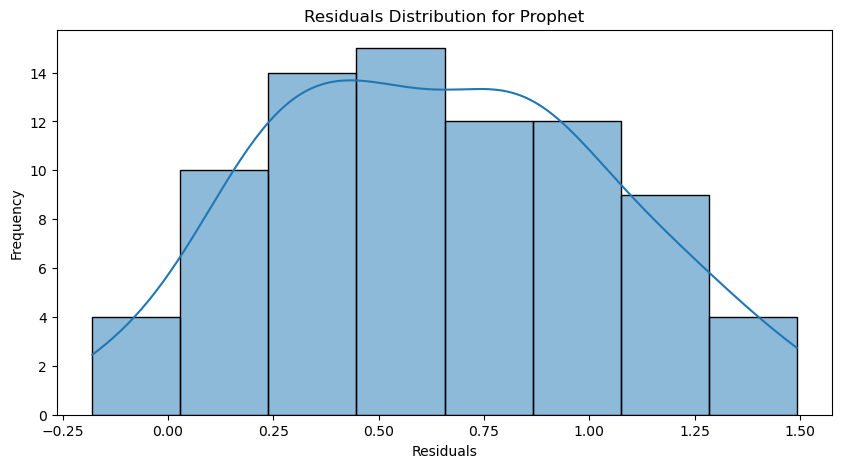

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


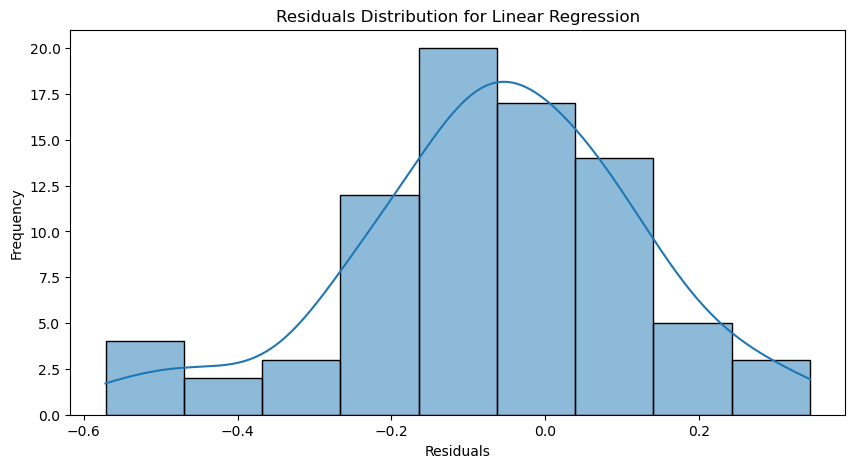

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


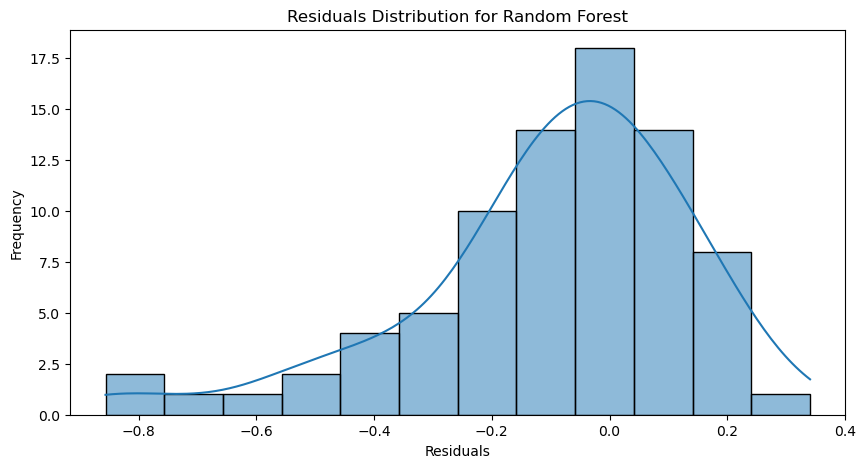

C:\Users\bhupa\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\bhupa\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


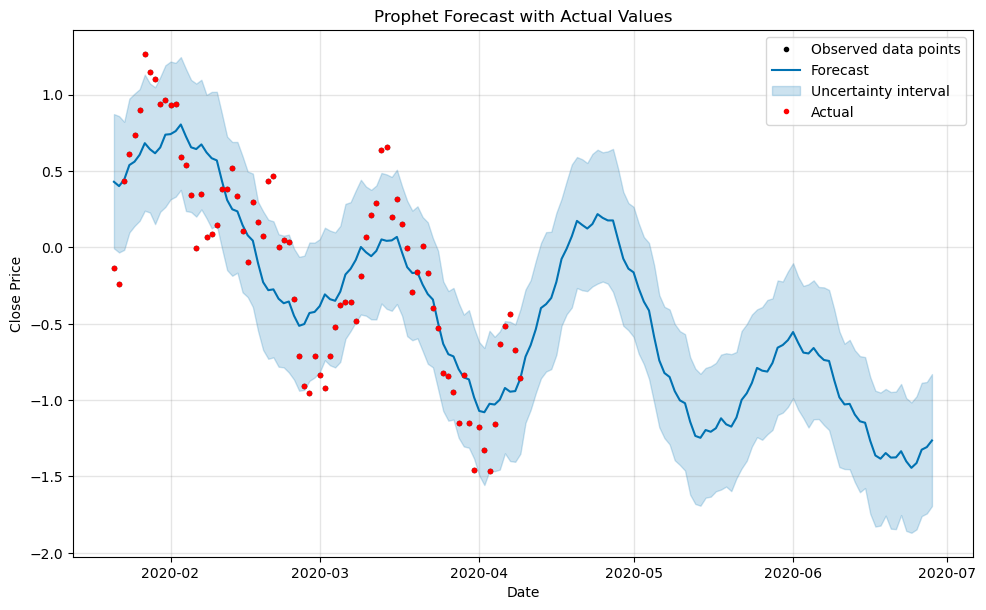

In [56]:

# Analyze the most significant variables for each algorithm
def analyze_significant_variables(linear_model, rf_model, X_columns):
    # Linear Regression coefficients
    linear_coef = pd.Series(linear_model.coef_, index=X_columns).sort_values(key=abs, ascending=False)
    print("Linear Regression Significant Variables:")
    print(linear_coef.head(10))
    
    # Random Forest feature importances
    rf_importances = pd.Series(rf_model.feature_importances_, index=X_columns).sort_values(ascending=False)
    print("\nRandom Forest Significant Variables:")
    print(rf_importances.head(10))


analyze_significant_variables(linear_regression_model, random_forest_model, X_selected.columns)


# Analyze the types of errors the models make
def plot_residuals(true, predicted, model_name):
    residuals = true - predicted
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

plot_residuals(y, prophet_predicted, 'Prophet')
plot_residuals(y, linear_regression_predicted, 'Linear Regression')
plot_residuals(y, random_forest_predicted, 'Random Forest')

# Plot Prophet default graph with trend, upper, lower, predicted, and actual values
def plot_prophet_forecast(model, forecast, actual, model_name):
    fig = model.plot(forecast)
    plt.plot(actual.index, actual.values, 'r.', label='Actual')
    plt.legend()
    plt.title(f'{model_name} Forecast with Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

plot_prophet_forecast(prophet_model, prophet_forecast, y, 'Prophet')